In [4]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'

file_path = '다문화통합데이터정리_cp949.csv'
data = pd.read_csv(file_path, encoding='utf-8')

data_info = data.info()
data_head = data.head()

data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   행정구                             25 non-null     object 
 1   2022_초등학생수_계                    25 non-null     int64  
 2   2022_중학교_계                      25 non-null     int64  
 3   2022_고등학교_계                     25 non-null     int64  
 4   2022_초등학생_국내출생자녀_소계             25 non-null     int64  
 5   2022_초등학생_외국인가정자녀_소계            25 non-null     int64  
 6   2022_초등학생_중도입국자녀_소계             25 non-null     int64  
 7   2022_다문화가구_소계                   25 non-null     int64  
 8   2022_가구원_소계                     25 non-null     int64  
 9   2021_합계_소계                      25 non-null     int64  
 10  2021_한국국적을 가지지 않은 자_소계          25 non-null     int64  
 11  2022_인구                         25 non-null     int64  
 12  2022_인구밀도                       25 non

(None,
    행정구  2022_초등학생수_계  2022_중학교_계  2022_고등학교_계  2022_초등학생_국내출생자녀_소계  \
 0  종로구           163          72           84                  103   
 1   중구           269          72           99                  130   
 2  용산구           408         139           79                  219   
 3  성동구           439         135           47                  286   
 4  광진구           505         140           65                  279   
 
    2022_초등학생_외국인가정자녀_소계  2022_초등학생_중도입국자녀_소계  2022_다문화가구_소계  2022_가구원_소계  \
 0                    46                   14           1178         3067   
 1                   127                   12           1327         3372   
 2                   154                   35           2259         6020   
 3                   124                   29           2156         5730   
 4                   199                   27           2703         6623   
 
    2021_합계_소계  ...  도서관개수  다문화가족복지센터개수  다문화언어강사인원  어린이복지센터개수  \
 0       12009  ...      9          

min-max
Z-score로 진행해봄

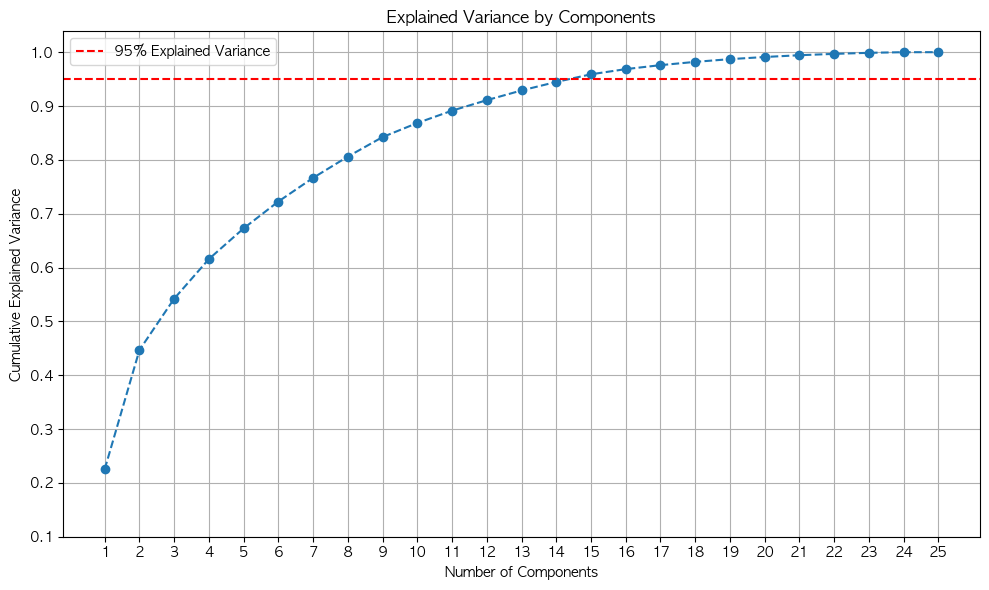

,Principal Component,Cumulative Explained Variance
0,1,0.225421
1,2,0.446740
2,3,0.542153
3,4,0.615793
4,5,0.672787
5,6,0.722638
6,7,0.766588
7,8,0.806055
8,9,0.842339
9,10,0.868448


In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

data_numeric = data.drop(columns=['행정구'])
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_numeric)

pca = PCA()
data_pca = pca.fit_transform(data_scaled)

pc_variances = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pc_variances)+1), pc_variances.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.xticks(range(1, len(pc_variances)+1))
plt.yticks([round(i*0.1,1) for i in range(1, 11)])
plt.axhline(y=0.95, color='r', linestyle='--', label="95% Explained Variance")
plt.legend(loc='best')
plt.tight_layout()
plt.show()

explained_var_cumsum = pc_variances.cumsum()
explained_var_table = pd.DataFrame({
    'Principal Component': range(1, len(explained_var_cumsum)+1),
    'Cumulative Explained Variance': explained_var_cumsum
})

explained_var_table.head(10)


차원의 저주에 걸리네.. 2,3개로 54%정도밖에 설명을 못해 ㅠ 
변수 선택을 잘해야겠네

/Users/haneul/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/haneul/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/haneul/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/haneul/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/haneul/an

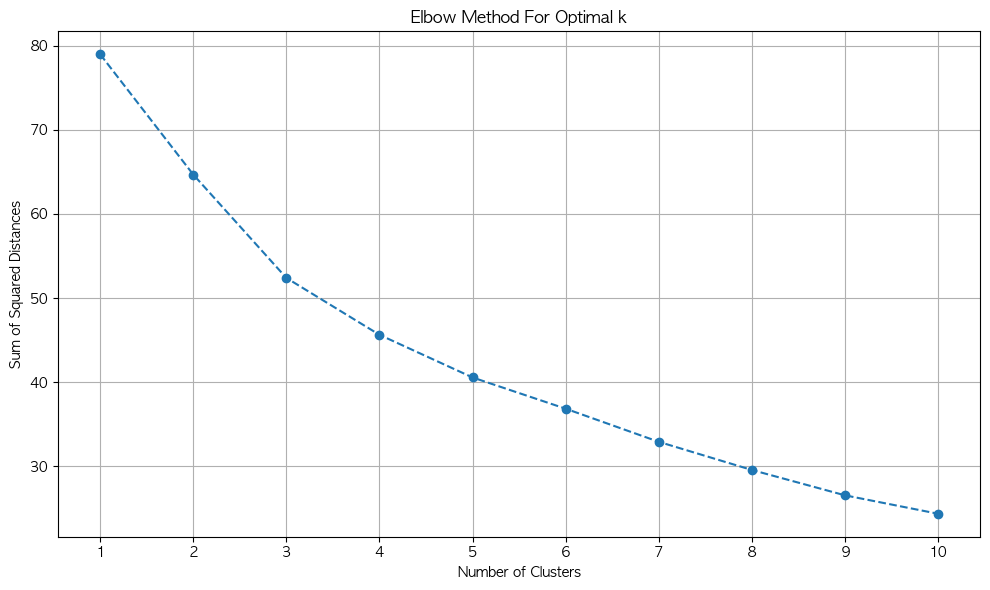

In [6]:
from sklearn.cluster import KMeans

data_pca_15 = data_pca[:, :15]

ssd = []
range_n_clusters = list(range(1, 11))

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(data_pca_15)
    
    ssd.append(kmeans.inertia_)
    
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, ssd, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.grid(True)
plt.xticks(range_n_clusters)
plt.tight_layout()
plt.show()


In [7]:

kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_pca_15)

data_clustered = pd.concat([data[['행정구', 'Cluster']], data_numeric], axis=1)

cluster_mean = data_clustered.groupby('Cluster').mean()

cluster_assignment = data[['행정구', 'Cluster']]

(cluster_assignment, cluster_mean.transpose())


/Users/haneul/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/yh/smj7ptzs057g14vbhqqqhcq00000gn/T/ipykernel_21467/1160682031.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_mean = data_clustered.groupby('Cluster').mean()


(     행정구  Cluster
 0    종로구        0
 1     중구        0
 2    용산구        0
 3    성동구        0
 4    광진구        0
 5   동대문구        0
 6    중랑구        2
 7    성북구        2
 8    강북구        2
 9    도봉구        2
 10   노원구        1
 11   은평구        2
 12  서대문구        0
 13   마포구        0
 14   양천구        2
 15   강서구        1
 16   구로구        3
 17   금천구        0
 18  영등포구        3
 19   동작구        2
 20   관악구        2
 21   서초구        1
 22   강남구        1
 23   송파구        1
 24   강동구        1,
 Cluster                                     0              1              2  \
 2022_초등학생수_계                       420.888889     403.666667     499.500000   
 2022_중학교_계                         137.333333     129.666667     180.500000   
 2022_고등학교_계                         74.333333      75.166667      87.125000   
 2022_초등학생_국내출생자녀_소계                242.000000     314.333333     373.500000   
 2022_초등학생_외국인가정자녀_소계               153.666667      55.500000      94.250000   
 2022_초등학생_중도입국자녀_소계     

/var/folders/yh/smj7ptzs057g14vbhqqqhcq00000gn/T/ipykernel_21467/1822260467.py:14: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
/Users/haneul/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


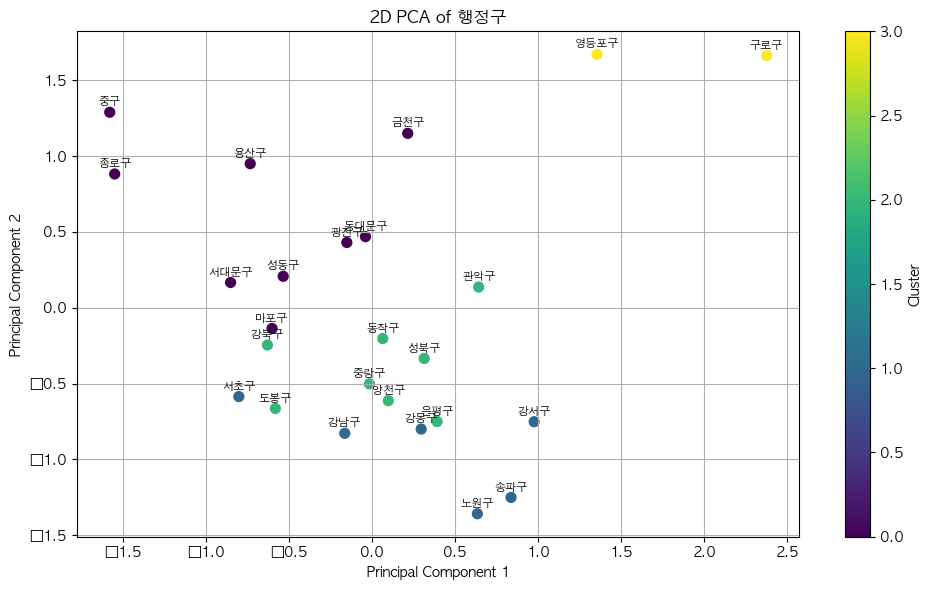

In [8]:

plt.figure(figsize=(10, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=data['Cluster'], cmap='viridis', s=50)

for i, txt in enumerate(data['행정구']):
    plt.annotate(txt, (data_pca[i, 0], data_pca[i, 1]), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)

plt.title('2D PCA of 행정구')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


In [9]:
cluster_mean_transposed = cluster_mean.transpose()

highlight_max = lambda x: ['font-weight: bold' if v == x.max() else '' for v in x]
cluster_mean_highlighted = cluster_mean_transposed.style.apply(highlight_max, axis=1)

cluster_mean_highlighted


Cluster,0,1,2,3
2022_초등학생수_계,420.888889,403.666667,499.500000,1286.500000
2022_중학교_계,137.333333,129.666667,180.500000,467.500000
2022_고등학교_계,74.333333,75.166667,87.125000,181.000000
2022_초등학생_국내출생자녀_소계,242.000000,314.333333,373.500000,436.500000
2022_초등학생_외국인가정자녀_소계,153.666667,55.500000,94.250000,788.000000
2022_초등학생_중도입국자녀_소계,25.222222,33.833333,31.750000,62.000000
2022_다문화가구_소계,2353.111111,2691.666667,2662.875000,7159.000000
2022_가구원_소계,6028.111111,7658.666667,7093.500000,16752.500000
2021_합계_소계,17867.333333,10503.333333,12435.625000,51716.000000
2021_한국국적을 가지지 않은 자_소계,15435.888889,7680.333333,9480.875000,43114.000000


**클러스터별 특성 분석 <br>**
클러스터 0:<br>
대체로 중간 수준의 다문화 가구와 학생들이 있음.<br>
외국인 인구는 상대적으로 낮은 편.<br>
통학 인구는 높은 편.<br>
클러스터 1:<br>
전체적으로 낮거나 중간 수준의 값들을 가짐.<br>
다문화 가구와 학생들은 상대적으로 적음.<br>
주민등록인구와 생활인구 비율이 높아, 주거 지역으로 판단됨.<br>
클러스터 2:<br>
전체적으로 낮거나 중간 수준의 값들을 가짐.<br>
다문화 가구와 학생들은 상대적으로 적음.<br>
주민등록인구와 생활인구 비율이 낮아, 상업 지역으로 판단됨.<br>
클러스터 3:<br>
다문화 가구, 다문화 학생(초, 중, 고), 외국인 인구가 가장 높음.<br>
주민등록인구와 생활인구 비율은 중간 수준.<br>

**분석 결론<br>**
다문화 친화적인 동네: 클러스터 3이 다문화 가구와 학생, 외국인 인구가 많기 때문에 다문화 친화적인 동네로 판단됩니다. 이 클러스터에 속한 동네들은 다문화 사회와의 소통 및 협력이 활발할 가능성이 있습니다.<br>
주의가 필요한 동네: 클러스터 1과 클러스터 2는 다문화 가구와 학생, 외국인 인구가 상대적으로 적습니다. 이는 이 동네들에서 다문화 친화 정책이나 프로그램이 필요할 수 있음을 의미할 수 있습니다.<br>

## 어거지로 진행해봐도 주성분분석이 흠인 것 같다.

In [11]:
import seaborn as sns

basic_stats = data_numeric.describe().transpose()

correlation_matrix = data_numeric.corr()

from sklearn.ensemble import RandomForestRegressor


rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(data_numeric, data_pca[:, 0])
feature_importance = pd.Series(rf.feature_importances_, index=data_numeric.columns).sort_values(ascending=False)

top_correlations = correlation_matrix.apply(lambda x: x.nlargest(4).iloc[1:])

(basic_stats, top_correlations, feature_importance)


(                                count           mean            std  \
 2022_초등학생수_계                     25.0     511.160000     292.683088   
 2022_중학교_계                       25.0     175.720000     107.805195   
 2022_고등학교_계                      25.0      87.160000      51.275140   
 2022_초등학생_국내출생자녀_소계              25.0     317.000000     118.751491   
 2022_초등학생_외국인가정자녀_소계             25.0     161.840000     216.191404   
 2022_초등학생_중도입국자녀_소계              25.0      32.320000      14.896084   
 2022_다문화가구_소계                    25.0    2917.960000    1532.396910   
 2022_가구원_소계                      25.0    7618.320000    3393.079461   
 2021_합계_소계                       25.0   17069.720000   12150.657861   
 2021_한국국적을 가지지 않은 자_소계           25.0   13883.200000   10472.022982   
 2022_인구                          25.0  386706.760000  125442.794588   
 2022_인구밀도                        25.0   16810.200000    4708.928682   
 소비경기지수                           25.0     119.324000       6.28

변수결합을 해야할 것 같다. 예를들어,. 인프라와 인구의 비율을 나타내는 새로운 변수를 만들던지..<br>
그 이후 변수 차원 축소해야할 듯?<br>
그이후 변수 중요도에 따라 가중치를 부여? (결정트리 모델로 변수 중요도 생성)
가장 중요하다고 생각되는 변수에 높은 가중치가 필요..모든 변수가 동일한 중요도를 가지고 있지 않아...어떻게 하지ㅠㅠㅠㅠ